In [13]:
import pandas as pd

data = pd.read_hdf('../../data/events_anomalydetection.h5', start=0, stop=10_000).to_numpy()
data, truth_bit = data[:, :-1], data[:, -1]

In [1]:
import pandas as pd
import matplotlib as plt
import sys

print(sys.version_info)
df = pd.read_hdf("./tmp/scalars_bkg01.h5")

sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)


In [3]:
print(df.shape)
df.columns


(907, 46)


Index(['mjj', 'nj', 'nisj_2', 'nesj_2', 'tau1_2', 'tau2_2', 'tau3_2',
       'tau32_2', 'tau21_2', 'eRing0_2', 'eRing1_2', 'eRing2_2', 'eRing3_2',
       'eRing4_2', 'eRing5_2', 'eRing6_2', 'eRing7_2', 'eRing8_2', 'eRing9_2',
       'nisj_1', 'nesj_1', 'tau1_1', 'tau2_1', 'tau3_1', 'tau32_1', 'tau21_1',
       'eRing0_1', 'eRing1_1', 'eRing2_1', 'eRing3_1', 'eRing4_1', 'eRing5_1',
       'eRing6_1', 'eRing7_1', 'eRing8_1', 'eRing9_1', 'pt_2', 'eta_2',
       'phi_2', 'mass_2', 'e_2', 'pt_1', 'eta_1', 'phi_1', 'mass_1', 'e_1'],
      dtype='object')

In [3]:
import numpy as np

x = np.array([1, 10, 100, 1_000, 10_000, 100_000])

y_new1 = np.array([0.5645, 0.5441, 0.7290, 2.823, 22.857, 223.814])
y_new1_err = np.array([0.0138, 0.0162, 0.0082, 0.135, 0.664, 2.284])

y_new5 = np.array([0.485, 0.7574, 0.7984, 1.372, 6.744, 63.748])
y_new5_err = np.array([0.0254, 0.0152, 0.034, 0.072, 0.268, 1.340])

y_old1 = np.array([0.610, 0.7071, 1.207, 6.789, 67.479, 673.336])
y_old1_err = np.array([0.0151, 0.0183, 0.042, 0.385, 0.718, 20.229])

y_old5 = np.array([0.6033, 0.868, 1.138, 2.360, 16.373, 165.224])
y_old5_err = np.array([0.0301, 0.0609, 0.047, 0.075, 0.234, 1.730])

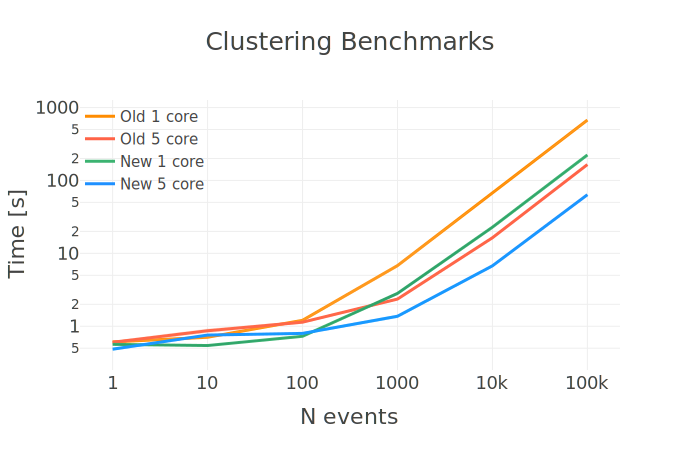

In [5]:
import plotly.graph_objects as go
import plotly.io as pio 
pio.templates.default = "presentation"

fig = go.Figure()


fig.add_trace(go.Scatter(x=x,
        y=y_old1,
        line=dict(color='darkorange'),
        mode='lines', name="Old 1 core"))

fig.add_trace(go.Scatter(x=np.hstack([x, x[::-1]]),
        y=np.hstack([y_old1+y_old1_err, (y_old1-y_old1_err)[::-1]]),
        fill='toself',
        fillcolor='rgba(255,208,151,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False))

fig.add_trace(go.Scatter(x=x,
        y=y_old5,
        line=dict(color='tomato'),
        mode='lines', name="Old 5 core"))

fig.add_trace(go.Scatter(x=np.hstack([x, x[::-1]]),
        y=np.hstack([y_old5+y_old5_err, (y_old5-y_old5_err)[::-1]]),
        fill='toself',
        fillcolor='rgba(255,127,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False))

fig.add_trace(go.Scatter(x=x,
        y=y_new1,
        line=dict(color='mediumseagreen'),
        mode='lines', name="New 1 core"))

fig.add_trace(go.Scatter(x=np.hstack([x, x[::-1]]),
        y=np.hstack([y_new1+y_new1_err, (y_new1-y_new1_err)[::-1]]),
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False))

fig.add_trace(go.Scatter(x=x,
        y=y_new5,
        line=dict(color='dodgerblue'),
        mode='lines', name="New 5 core"))

fig.add_trace(go.Scatter(x=np.hstack([x, x[::-1]]),
        y=np.hstack([y_new5+y_new5_err, (y_new5-y_new5_err)[::-1]]),
        fill='toself',
        fillcolor='rgba(0,191,255,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False))

fig.update_xaxes(type="log")
fig.update_yaxes(type="log")
fig.update_layout(
        title="Clustering Benchmarks",
        xaxis_title="N events",
        yaxis_title="Time [s]",
        paper_bgcolor='rgba(0,0,0,0)',
                legend = dict(x=0, y=1,
                traceorder='normal',
                font=dict(size=15)),
        width=700, showlegend=True)

fig.show("svg")
fig.write_image("benchmark.pdf")

In [6]:
import pandas as pd
from scipy.stats import entropy
from plotly.subplots import make_subplots


In [9]:
cols  = ['pt_1', 'eta_1', 'phi_1', 'e_1', 'mass_1', 'nisj_1', 'nesj_1', 'tau1_1', 'tau2_1', 'tau3_1', 'tau32_1', 'tau21_1', 
         'pt_2', 'eta_2', 'phi_2', 'e_2', 'mass_2', 'nisj_2', 'nesj_2', 'tau1_2', 'tau2_2', 'tau3_2', 'tau32_2', 'tau21_2',
         'eRing0_1', 'eRing1_1', 'eRing2_1', 'eRing3_1', 'eRing4_1', 'eRing5_1', 'eRing6_1', 'eRing7_1', 'eRing8_1', 'eRing9_1',
         'eRing0_2', 'eRing1_2', 'eRing2_2', 'eRing3_2', 'eRing4_2', 'eRing5_2', 'eRing6_2', 'eRing7_2', 'eRing8_2', 'eRing9_2'
         ]

def optimal_grid(n):
    rows = np.floor(np.sqrt(n))
    residual = 1 if n%rows != 0 else 0
    cols = n//rows + residual
    return int(rows), int(cols)


def features_plot(old, new,
                  bins: int = 20):

    rows, cols = optimal_grid(new.shape[1])
    labels  = ['pt_1', 'eta_1', 'phi_1', 'e_1', 'mass_1', 'nisj_1', 'nesj_1', 'tau1_1', 'tau2_1', 'tau3_1', 'tau32_1', 'tau21_1', 
         'pt_2', 'eta_2', 'phi_2', 'e_2', 'mass_2', 'nisj_2', 'nesj_2', 'tau1_2', 'tau2_2', 'tau3_2', 'tau32_2', 'tau21_2',
         'eRing0_1', 'eRing1_1', 'eRing2_1', 'eRing3_1', 'eRing4_1', 'eRing5_1', 'eRing6_1', 'eRing7_1', 'eRing8_1', 'eRing9_1',
         'eRing0_2', 'eRing1_2', 'eRing2_2', 'eRing3_2', 'eRing4_2', 'eRing5_2', 'eRing6_2', 'eRing7_2', 'eRing8_2', 'eRing9_2'
         ]
    data = {'true':[], 'sample':[], 'bins':[], 'kl':[]}
    for i in range(new.shape[1]):
        x1 = np.clip(old[:,i], np.percentile(old[:,i], 1), np.percentile(old[:,i], 99))
        x2 = np.clip(new[:,i], np.percentile(new[:,i], 1), np.percentile(new[:,i], 99))
        n1, b = np.histogram(x1, bins=bins, density=True)
        n2, _ = np.histogram(x2, bins=b, density=True)
        kl=f"{labels[i]} (kl={entropy(n1, n2):.2f})"
        data['bins'].append(b[:-1])
        data['true'].append(n1)
        data['sample'].append(n2)
        data['kl'].append(kl)
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=data['kl'])
    for i in range(new.shape[1]):
        fig.add_trace(go.Bar(x=data['bins'][i], y=data['true'][i],
                name='Old Clustering', marker_color='steelblue',
                showlegend=(i==0)),
            row=i//cols+1, col=i%cols+1
            )
        fig.add_trace(go.Bar(x=data['bins'][i], y=data['sample'][i],
                name='New Clustering', marker_color='coral',
                showlegend=(i==0)),
            row=i//cols+1, col=i%cols+1
            )
        # fig.update_xaxes(title_text=labels[i], ticklabelposition="inside top",
        #                 row=i//cols+1, col=i%cols+1, tickfont=dict(size=5))
    fig.update_yaxes(showticklabels=False,)
    fig.update_xaxes(tickfont=dict(size=9))
    fig.update_layout(
            bargap=0,showlegend=False,
            height=500, title="Clustering Validation",
            width=1000,
            paper_bgcolor='rgba(0,0,0,0)',
                legend = dict(x=0, y=1,
                traceorder='normal',
                font=dict(size=15)),)
    return fig

In [7]:
c = list(new_bkg.columns)


NameError: name 'new_bkg' is not defined

In [8]:
old_bkg.columns

NameError: name 'old_bkg' is not defined

In [8]:
new_bkg = pd.read_hdf("scalars_bkg.h5")[cols]
old_bkg = pd.read_hdf("bkgHLF_merged.h5")
old_bkg.drop(["nc1", "nc2", "mjjj", "mjj", "nj", 'eRing0_3', 'eRing1_3',
       'eRing2_3', 'eRing3_3', 'eRing4_3', 'eRing5_3', 'eRing6_3', 'eRing7_3',
       'eRing8_3', 'eRing9_3', 'pt3', 'eta3',
       'phi3', 'E3', 'm3', 'nc3', 'nisj3', 'nesj3', '1tau3', '2tau3', '3tau3',
       '32tau3', '21tau3'], 1, inplace=True)

new_bkg.replace([np.inf, -np.inf], 0, inplace=True)
old_bkg.replace([np.inf, -np.inf], 0, inplace=True)

FileNotFoundError: File scalars_bkg.h5 does not exist

In [17]:
!ls ../2jet/

BBOX1  BBOX2  BBOX3  BBOXMC  RnD


In [11]:
new_bkg.shape
old_bkg.shape

NameError: name 'new_bkg' is not defined

In [12]:
fig = features_plot(new_bkg.to_numpy()[:,:24], old_bkg.to_numpy()[:,:24])
fig.write_image("validation.pdf")

NameError: name 'new_bkg' is not defined

In [13]:
new_bkg["nesj_1"]

NameError: name 'new_bkg' is not defined

In [14]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(2, len(s)+1))

In [4]:
df = pd.read_hdf("./tiny_data.h5")

In [5]:
b = {"q":1}
a = {"t":10}

a.update(b)

print(a.update(b))

None


In [4]:
b = {"q":1}
a = {"t":10}.update(b)

print(a)

None


In [16]:
import numpy as np
import pandas as pd
from LHCO import download_file

feat = pd.read_hdf("download/RnD_features.h5")
df =  pd.read_hdf("download/results_scalars_bkg.h5")[["tau21_1", "tau32_1"]]

In [17]:
feat["tau2j1"]/feat["tau1j1"]

0          0.583317
1          0.519086
2          0.789584
3          0.277956
4          0.577303
             ...   
1099995    0.225403
1099996    0.271544
1099997    0.166132
1099998    0.153972
1099999    0.797727
Length: 1100000, dtype: float64

In [18]:
df.head(10)

,tau21_1,tau32_1
0,0.368840,0.853400
1,0.421453,0.477680
2,0.253896,0.850517
3,0.010222,0.870240
4,0.887206,0.924645
5,0.284347,0.920714
6,0.925198,0.933174
7,0.433132,0.681442
8,0.856302,1.009731
9,0.982870,0.975647
